# Preprocessing 

In [1]:
import pandas as pd
import numpy as np

In [4]:
movie=pd.read_csv('E:\\TH\\DS108-Tien xu ly\\Project\\movie_data.csv')
movie.head(10)

,Name of movie,Year of release,Watchtime,Genre,Classification,Movie Rating,Metascore,Votes,Gross collection,Des
0,Avatar,2009,162,"Action, Adventure, Fantasy",PG-13,7.9,83.0,"1,382,237","2,923,706,026",A paraplegic Marine dispatched to the moon Pan...
1,Avengers: Endgame,2019,181,"Action, Adventure, Drama",PG-13,8.4,78.0,"1,258,255","2,799,439,100",After the devastating events of Avengers: Infi...
2,Avatar: The Way of Water,2022,192,"Action, Adventure, Fantasy",PG-13,7.6,67.0,"489,673","2,320,250,281",Jake Sully lives with his newfound family form...
3,Titanic,1997,194,"Drama, Romance",PG-13,7.9,75.0,"1,275,021","2,264,743,305",A seventeen-year-old aristocrat falls in love ...
4,Star Wars: Episode VII - The Force Awakens,2015,138,"Action, Adventure, Sci-Fi",PG-13,7.8,80.0,"971,285","2,071,310,218","As a new threat to the galaxy rises, Rey, a de..."
5,Avengers: Infinity War,2018,149,"Action, Adventure, Sci-Fi",PG-13,8.4,68.0,"1,195,837","2,052,415,039",The Avengers and their allies must be willing ...
6,Spider-Man: No Way Home,2021,148,"Action, Adventure, Fantasy",PG-13,8.2,71.0,"872,091","1,921,847,111","With Spider-Man's identity now revealed, Peter..."
7,Jurassic World,2015,124,"Action, Adventure, Sci-Fi",PG-13,6.9,59.0,"677,317","1,671,537,444","A new theme park, built on the original site o..."
8,The Lion King,2019,118,"Animation, Adventure, Drama",PG,6.8,55.0,"266,002","1,663,075,401","After the murder of his father, a young lion p..."
9,The Avengers,2012,143,"Action, Sci-Fi",PG-13,8.0,69.0,"1,455,536","1,520,538,536",Earth's mightiest heroes must come together an...


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name of movie     1000 non-null   object 
 1   Year of release   1000 non-null   int64  
 2   Watchtime         1000 non-null   int64  
 3   Genre             1000 non-null   object 
 4   Classification    978 non-null    object 
 5   Movie Rating      1000 non-null   float64
 6   Metascore         1000 non-null   int64  
 7   Votes             1000 non-null   int64  
 8   Gross collection  1000 non-null   int64  
 9   Des               1000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 78.3+ KB


In [5]:
movie['Metascore'] = movie['Metascore'].fillna(0).astype('int64')
movie['Votes'] =movie['Votes'].str.replace(',', '').astype('int64')
movie['Gross collection']=movie['Gross collection'].str.replace(',','').astype('int64')

In [6]:
movie

,Name of movie,Year of release,Watchtime,Genre,Classification,Movie Rating,Metascore,Votes,Gross collection,Des
0,Avatar,2009,162,"Action, Adventure, Fantasy",PG-13,7.9,83,1382237,2923706026,A paraplegic Marine dispatched to the moon Pan...
1,Avengers: Endgame,2019,181,"Action, Adventure, Drama",PG-13,8.4,78,1258255,2799439100,After the devastating events of Avengers: Infi...
2,Avatar: The Way of Water,2022,192,"Action, Adventure, Fantasy",PG-13,7.6,67,489673,2320250281,Jake Sully lives with his newfound family form...
3,Titanic,1997,194,"Drama, Romance",PG-13,7.9,75,1275021,2264743305,A seventeen-year-old aristocrat falls in love ...
4,Star Wars: Episode VII - The Force Awakens,2015,138,"Action, Adventure, Sci-Fi",PG-13,7.8,80,971285,2071310218,"As a new threat to the galaxy rises, Rey, a de..."
...,...,...,...,...,...,...,...,...,...,...
995,Hot Shots!,1991,85,"Action, Comedy",PG-13,6.7,61,116214,181096164,A parody of Top Gun (1986) in which a talented...
996,Road to Perdition,2002,117,"Crime, Drama, Thriller",R,7.7,72,283762,181001478,A mob enforcer's son in 1930s Illinois witness...
997,Kill Bill: Vol. 1,2003,111,"Action, Crime, Thriller",R,8.2,69,1186947,180906076,"After awakening from a four-year coma, a forme..."
998,The Scorpion King,2002,92,"Action, Adventure, Fantasy",PG-13,5.5,45,145110,180630907,A desert warrior rises up against the evil arm...


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast
from sklearn.model_selection import train_test_split
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:

# Đọc file CSV thứ nhất và thứ hai
#file movies_metadata có chứa keywords
data = pd.read_csv('E:\\TH\\DS108-Tien xu ly\\Project\\keywords.csv')
movie= pd.read_csv('E:\\TH\\DS108-Tien xu ly\\Project\\movie_data.csv')

merged_df = movie.merge(data[['title', 'keywords']], left_on=['Name of movie'], right_on=['title'], how='left')
merged_df = merged_df.drop(columns=['title'])
merged_df.drop_duplicates(subset=["Name of movie","Year of release"], inplace=True)
merged_df


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3244\2362330249.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('E:\\TH\\DS108-Tien xu ly\\Project\\keywords.csv')


,Name of movie,Year of release,Watchtime,Genre,Classification,Movie Rating,Metascore,Votes,Gross collection,Des,keywords
0,Avatar,2009,162,"Action, Adventure, Fantasy",PG-13,7.9,83.0,"1,382,237","2,923,706,026",A paraplegic Marine dispatched to the moon Pan...,"[{'id': 1463, 'name': 'culture clash'}, {'id':..."
1,Avengers: Endgame,2019,181,"Action, Adventure, Drama",PG-13,8.4,78.0,"1,258,255","2,799,439,100",After the devastating events of Avengers: Infi...,NaN
2,Avatar: The Way of Water,2022,192,"Action, Adventure, Fantasy",PG-13,7.6,67.0,"489,673","2,320,250,281",Jake Sully lives with his newfound family form...,NaN
3,Titanic,1997,194,"Drama, Romance",PG-13,7.9,75.0,"1,275,021","2,264,743,305",A seventeen-year-old aristocrat falls in love ...,"[{'id': 2580, 'name': 'shipwreck'}, {'id': 298..."
6,Star Wars: Episode VII - The Force Awakens,2015,138,"Action, Adventure, Sci-Fi",PG-13,7.8,80.0,"971,285","2,071,310,218","As a new threat to the galaxy rises, Rey, a de...",NaN
...,...,...,...,...,...,...,...,...,...,...,...
1230,Hot Shots!,1991,85,"Action, Comedy",PG-13,6.7,61.0,"116,214","181,096,164",A parody of Top Gun (1986) in which a talented...,"[{'id': 3269, 'name': 'secret mission'}, {'id'..."
1231,Road to Perdition,2002,117,"Crime, Drama, Thriller",R,7.7,72.0,"283,762","181,001,478",A mob enforcer's son in 1930s Illinois witness...,"[{'id': 18712, 'name': 'based on graphic novel..."
1232,Kill Bill: Vol. 1,2003,111,"Action, Crime, Thriller",R,8.2,69.0,"1,186,947","180,906,076","After awakening from a four-year coma, a forme...","[{'id': 233, 'name': 'japan'}, {'id': 732, 'na..."
1233,The Scorpion King,2002,92,"Action, Adventure, Fantasy",PG-13,5.5,45.0,"145,110","180,630,907",A desert warrior rises up against the evil arm...,"[{'id': 1160, 'name': 'egypt'}, {'id': 1530, '..."


In [12]:
#merged_df.to_csv('E:\\TH\\DS108-Tien xu ly\\ketqua.csv')

In [3]:
def convert_keywords_str_id(keywords_str):
    # Đảm bảo rằng keywords_str là một chuỗi
    keywords_str = str(keywords_str)
    # Tách chuỗi keywords_str thành danh sách các từ khóa
    keywords = keywords_str.split(', ')
    # Chuyển đổi từ khóa thành danh sách các từ điển
    keywords_dicts = [{'id': i, 'name': keyword} for i, keyword in enumerate(keywords)]
    return keywords_dicts


In [4]:
def convert_keywords_id_str(keywords_dicts_str):
    # Chuyển đổi chuỗi thành danh sách các từ điển
    keywords_dicts = ast.literal_eval(keywords_dicts_str)
    keywords = [d['name'] for d in keywords_dicts]
    keywords_str = ', '.join(keywords)

    return keywords_str


In [25]:

# Tách DataFrame thành hai, một với các bộ phim có từ khóa và một không có từ khóa
movie_keywords = merged_df[merged_df['keywords'].notna()]
movie_without_keywords = merged_df[merged_df['keywords'].isna()]
#movie_keywords.to_csv('E:\\TH\\DS108-Tien xu ly\\Project\\movies_with_keywords.csv', index=False)
#movie_without_keywords.to_csv('E:\\TH\\DS108-Tien xu ly\\Project\\movies_without_keywords.csv', index=False)

In [19]:
movie_keywords=pd.read_csv('E:\\TH\\DS108-Tien xu ly\\Project\\movies_with_keywords.csv')
movie_without_keywords=pd.read_csv('E:\\TH\\DS108-Tien xu ly\\Project\\movies_without_keywords.csv')
vectorizer = TfidfVectorizer()

    # Huấn luyện vectorizer và chuyển đổi Des của old_movies và new_movies thành vectơ TF-IDF
old_movies_des_tfidf = vectorizer.fit_transform(movie_keywords['Des'] + ' ' + movie_keywords['Name of movie'])
new_movies_des_tfidf = vectorizer.transform(movie_without_keywords['Des'] + ' ' + movie_without_keywords['Name of movie'])

    # Tính toán cosine similarity giữa Des của old_movies và new_movies
cosine_sim = cosine_similarity(new_movies_des_tfidf, old_movies_des_tfidf)

    # Dự đoán keywords cho new_movies dựa trên cosine similarity
movie_without_keywords['keywords'] = movie_keywords.loc[cosine_sim.argmax(axis=1), 'keywords'].values
movie_without_keywords

,Name of movie,Year of release,Watchtime,Genre,Classification,Movie Rating,Metascore,Votes,Gross collection,Des,id,keywords
0,Avengers: Endgame,2019,181,"Action, Adventure, Drama",PG-13,8.4,78.0,"1,258,255","2,799,439,100",After the devastating events of Avengers: Infi...,NaN,"[{'id': 393, 'name': 'civil war'}, {'id': 6091..."
1,Avatar: The Way of Water,2022,192,"Action, Adventure, Fantasy",PG-13,7.6,67.0,"489,673","2,320,250,281",Jake Sully lives with his newfound family form...,NaN,"[{'id': 1463, 'name': 'culture clash'}, {'id':..."
2,Star Wars: Episode VII - The Force Awakens,2015,138,"Action, Adventure, Sci-Fi",PG-13,7.8,80.0,"971,285","2,071,310,218","As a new threat to the galaxy rises, Rey, a de...",NaN,"[{'id': 797, 'name': 'showdown'}, {'id': 10013..."
3,Avengers: Infinity War,2018,149,"Action, Adventure, Sci-Fi",PG-13,8.4,68.0,"1,195,837","2,052,415,039",The Avengers and their allies must be willing ...,NaN,"[{'id': 1852, 'name': 'mutant'}, {'id': 4769, ..."
4,Spider-Man: No Way Home,2021,148,"Action, Adventure, Fantasy",PG-13,8.2,71.0,"872,091","1,921,847,111","With Spider-Man's identity now revealed, Peter...",NaN,"[{'id': 1872, 'name': 'loss of father'}, {'id'..."
...,...,...,...,...,...,...,...,...,...,...,...,...
226,Jian Bing Man,2015,113,Comedy,NaN,5.6,NaN,"1,393","186,699,768",A story of a disgraced actor struggling to fin...,NaN,"[{'id': 1357, 'name': 'fish'}, {'id': 1453, 'n..."
227,The Hitman's Bodyguard,2017,118,"Action, Comedy, Crime",R,6.9,47.0,"246,294","183,428,689",One of the world's top bodyguards gets a new c...,NaN,"[{'id': 1156, 'name': 'sister sister relations..."
228,The Monkey King: Havoc in Heaven's Palace,2014,90,"Action, Adventure, Family",Not Rated,4.9,NaN,"5,361","182,206,924",A monkey born from heavenly stone acquires sup...,NaN,"[{'id': 178856, 'name': 'folklore'}, {'id': 18..."
229,From Vegas to Macau III,2016,113,"Comedy, Drama",C16,2.6,NaN,"3,334","181,732,879",Ken is holding a wedding ceremony in Macau for...,NaN,"[{'id': 1005, 'name': 'karaoke'}, {'id': 1459,..."


In [22]:

movie_keywords=pd.read_csv("E:\\TH\\DS108-Tien xu ly\\Project\\movies_with_keywords.csv")
#movie_keywords['keywords'] = movie_keywords['keywords'].apply(convert_keywords_id_str)
# Gộp hai DataFrame lại với nhau
merged_df12 = pd.concat([movie_keywords, movie_without_keywords], ignore_index=True).sort_values(by='Year of release', ascending=False)

# Kiểm tra xem có phần tử nào trong cột 'keywords' rỗng không
empty_keywords = merged_df12['keywords'].isna().sum()
print(f"Số lượng phần tử rỗng trong cột 'keywords': {empty_keywords}")
merged_df12

#merged_df12.to_csv('E:\\TH\\DS108-Tien xu ly\\Project\\movieoffical.csv')

Số lượng phần tử rỗng trong cột 'keywords': 0


,Name of movie,Year of release,Watchtime,Genre,Classification,Movie Rating,Metascore,Votes,Gross collection,Des,id,keywords
842,Ant-Man and the Wasp: Quantumania,2023,124,"Action, Adventure, Comedy",PG-13,6.1,48.0,"225,565","476,071,180",Scott Lang and Hope Van Dyne are dragged into ...,NaN,"[{'id': 8828, 'name': 'marvel comic'}, {'id': ..."
828,Mission: Impossible - Dead Reckoning Part One,2023,163,"Action, Adventure, Thriller",PG-13,7.7,81.0,"241,622","567,535,383",Ethan Hunt and his IMF team must track down a ...,NaN,"[{'id': 220, 'name': 'berlin'}, {'id': 591, 'n..."
965,Dungeons & Dragons: Honor Among Thieves,2023,134,"Action, Adventure, Comedy",PG-13,7.2,72.0,"221,825","208,177,026",A charming thief and a band of unlikely advent...,NaN,"[{'id': 6054, 'name': 'friendship'}, {'id': 98..."
816,Fast X,2023,141,"Action, Adventure, Crime",PG-13,5.8,56.0,"117,445","704,709,660",Dom Toretto and his family are targeted by the...,NaN,"[{'id': 1161, 'name': 'brazil'}, {'id': 1812, ..."
853,John Wick: Chapter 4,2023,169,"Action, Crime, Thriller",R,7.7,78.0,"329,389","440,146,694",John Wick uncovers a path to defeating The Hig...,NaN,"[{'id': 476, 'name': 'self-fulfilling prophecy..."
...,...,...,...,...,...,...,...,...,...,...,...,...
663,The Jungle Book,1967,78,"Animation, Adventure, Comedy",G,7.6,65.0,"197,880","205,843,612",Bagheera the Panther and Baloo the Bear have a...,9325.0,"[{'id': 958, 'name': 'indian lead'}, {'id': 23..."
620,One Hundred and One Dalmatians,1961,79,"Animation, Adventure, Comedy",G,7.3,83.0,"181,492","215,880,014",When a litter of Dalmatian puppies are abducte...,12230.0,"[{'id': 8841, 'name': 'puppy'}, {'id': 10336, ..."
467,Bambi,1942,69,"Animation, Adventure, Drama",G,7.3,91.0,"153,525","267,447,150",The story of a young deer growing up in the fo...,3170.0,"[{'id': 5774, 'name': 'forest'}, {'id': 10683,..."
245,Gone with the Wind,1939,238,"Drama, Romance, War",Passed,8.2,97.0,"333,102","402,382,193",A sheltered and manipulative Southern belle an...,770.0,"[{'id': 314, 'name': 'life and death'}, {'id':..."


In [9]:
offical = pd.read_csv('E:\\TH\\DS108-Tien xu ly\\Project\\movieoffical.csv')

# Thay thế các giá trị NaN trong cột 'keywords' bằng một chuỗi rỗng
offical['keywords'] = offical['keywords'].fillna('')

# Chuyển đổi từ khóa
offical['keywords'] = offical['keywords'].apply(convert_keywords_id_str)
offical
#offical.to_csv('E:\\TH\\DS108-Tien xu ly\\Project\\movieoffical-converted.csv')

,Name of movie,Year of release,Watchtime,Genre,Classification,Movie Rating,Metascore,Votes,Gross collection,Des,id,keywords
0,Ant-Man and the Wasp: Quantumania,2023,124,"Action, Adventure, Comedy",PG-13,6.1,48.0,"225,565","476,071,180",Scott Lang and Hope Van Dyne are dragged into ...,NaN,"marvel comic, superhero, based on comic, after..."
1,Mission: Impossible - Dead Reckoning Part One,2023,163,"Action, Adventure, Thriller",PG-13,7.7,81.0,"241,622","567,535,383",Ethan Hunt and his IMF team must track down a ...,NaN,"berlin, cia, vatican, white house, secret iden..."
2,Dungeons & Dragons: Honor Among Thieves,2023,134,"Action, Adventure, Comedy",PG-13,7.2,72.0,"221,825","208,177,026",A charming thief and a band of unlikely advent...,NaN,"friendship, spaceship, space, alien, alien inv..."
3,Fast X,2023,141,"Action, Adventure, Crime",PG-13,5.8,56.0,"117,445","704,709,660",Dom Toretto and his family are targeted by the...,NaN,"brazil, fbi, freedom, escape from prison, car ..."
4,John Wick: Chapter 4,2023,169,"Action, Crime, Thriller",R,7.7,78.0,"329,389","440,146,694",John Wick uncovers a path to defeating The Hig...,NaN,"self-fulfilling prophecy, washington d.c., evi..."
...,...,...,...,...,...,...,...,...,...,...,...,...
996,The Jungle Book,1967,78,"Animation, Adventure, Comedy",G,7.6,65.0,"197,880","205,843,612",Bagheera the Panther and Baloo the Bear have a...,9325.0,"indian lead, narration, human animal relations..."
997,One Hundred and One Dalmatians,1961,79,"Animation, Adventure, Comedy",G,7.3,83.0,"181,492","215,880,014",When a litter of Dalmatian puppies are abducte...,12230.0,"puppy, animation, dog, dalmatian"
998,Bambi,1942,69,"Animation, Adventure, Drama",G,7.3,91.0,"153,525","267,447,150",The story of a young deer growing up in the fo...,3170.0,"forest, coming of age, best friend, loss of lo..."
999,Gone with the Wind,1939,238,"Drama, Romance, War",Passed,8.2,97.0,"333,102","402,382,193",A sheltered and manipulative Southern belle an...,770.0,"life and death, civil war, southern usa, loss ..."


# VISUALIZE

In [4]:
movie = pd.read_csv('E:\\TH\\DS108-Tien xu ly\\Project\\movieoffical-converted.csv')
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name of movie     1001 non-null   object 
 1   Year of release   1001 non-null   int64  
 2   Watchtime         1001 non-null   int64  
 3   Genre             1001 non-null   object 
 4   Classification    979 non-null    object 
 5   Movie Rating      1001 non-null   float64
 6   Metascore         963 non-null    float64
 7   Votes             1001 non-null   object 
 8   Gross collection  1001 non-null   object 
 9   Des               1001 non-null   object 
 10  id                770 non-null    float64
 11  keywords          992 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 94.0+ KB


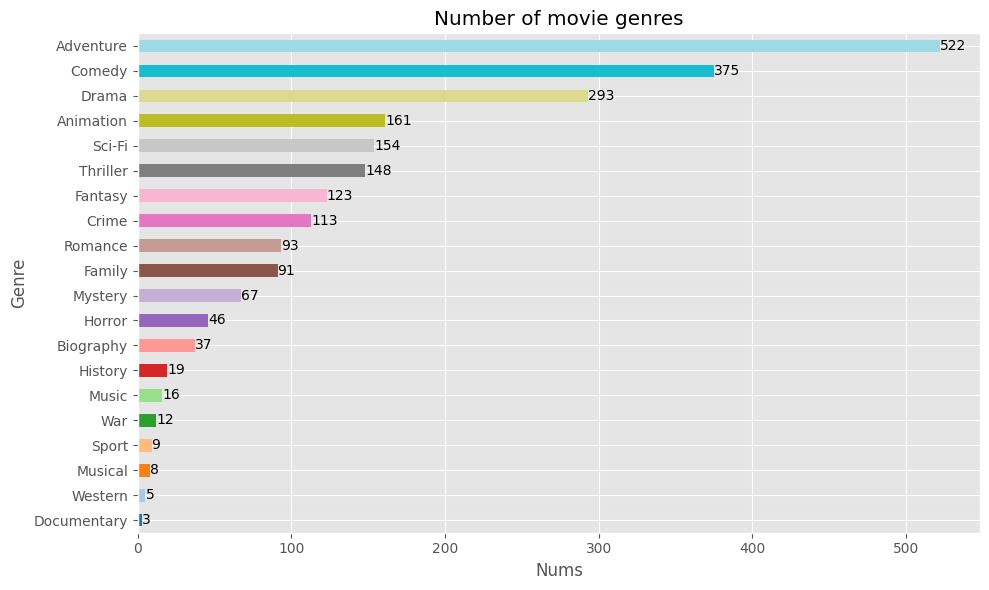

In [8]:
Genre = movie['Genre']
genre_encoded = Genre.str.get_dummies(sep=', ')
genre_counts = genre_encoded.iloc[:, 1:].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_counts.sort_values().plot(kind='barh', color=plt.cm.tab20.colors)
plt.title('Number of movie genres')
plt.xlabel('Nums')
plt.ylabel('Genre')
for i, count in enumerate(genre_counts.sort_values()):
    plt.text(count, i, f"{count:.0f}", va="center")
plt.tight_layout()
plt.show()

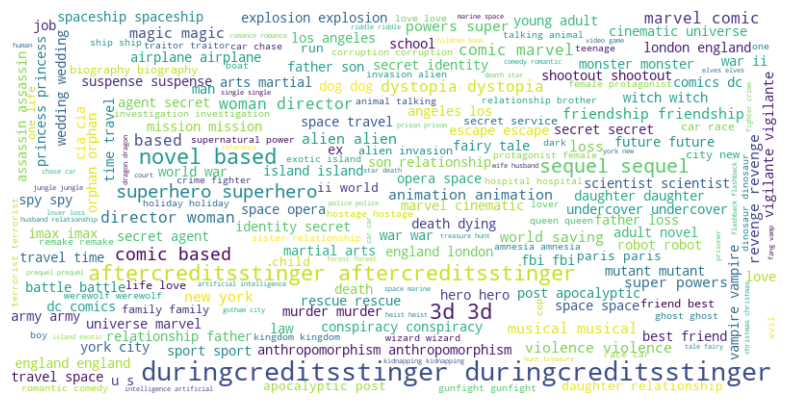

In [13]:
from wordcloud import WordCloud
keywords = movie['keywords']
keywords_dummies = keywords.str.get_dummies(sep=', ')
keywords_counts = keywords_dummies.iloc[:, 1:].sum().sort_values(ascending=False)
# Kết hợp tất cả từ khóa thành một chuỗi với tần suất của chúng
all_keywords = ' '.join([f"{word} " * freq for word, freq in keywords_counts.items()])

# Tạo word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Hiển thị word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

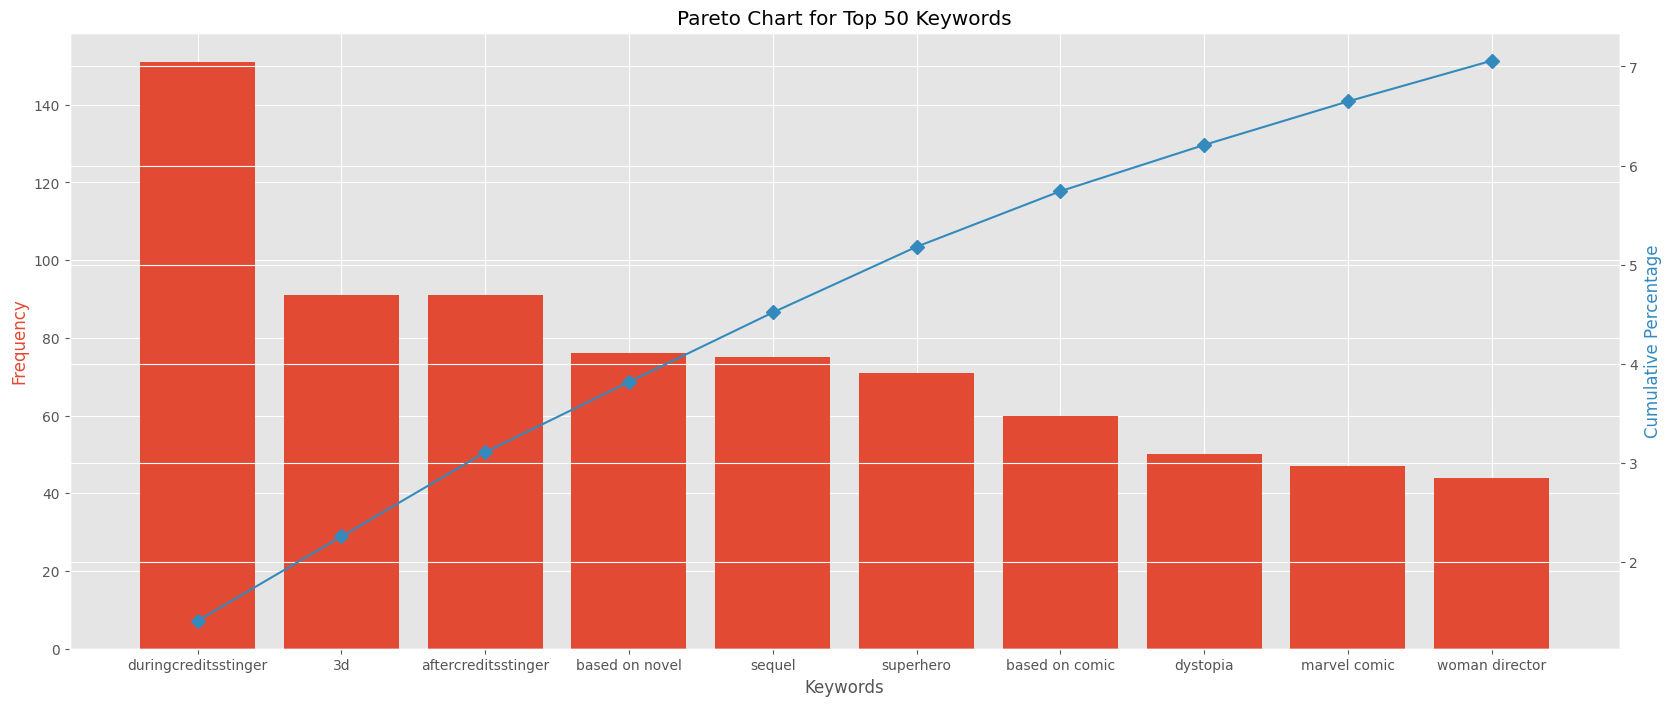

In [14]:
# Tính toán phần trăm tích lũy của tần suất
cum_percentage = keywords_counts.cumsum() / keywords_counts.sum() * 100

# Vẽ biểu đồ Pareto
fig, ax1 = plt.subplots(figsize=(20, 8))

ax1.bar(keywords_counts.index[:10], keywords_counts.values[:10], color='C0')
ax2 = ax1.twinx()
ax2.plot(keywords_counts.index[:10], cum_percentage[:10], color='C1', marker='D', ms=7)

ax1.set_title('Pareto Chart for Top 50 Keywords')
ax1.set_xlabel('Keywords')
ax1.set_ylabel('Frequency', color='C0')
ax2.set_ylabel('Cumulative Percentage', color='C1')

plt.show()

In [24]:
#Search theo Name of movie
def search_movies(keyword):
    keyword = keyword.lower()
    results = movie[movie['Name of movie'].str.lower().str.contains(keyword)]
    return results[['Name of movie','Year of release']]


search_movies("300")


,Name of movie,Year of release
370,300: Rise of an Empire,2014
651,300,2006


# Model

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import re
import nltk
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Cosine similarity


In [27]:

movie = pd.read_csv('E:\\TH\\DS108-Tien xu ly\\Project\\movieoffical-converted.csv')
def compute_similarity(m):
    movie = m.fillna('')
    movie['combined'] = movie['Name of movie'] + ' ' + movie['keywords'] + ' ' + movie['Genre'] + ' ' + movie['Des']
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(movie['combined'])
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return similarity_matrix, vectorizer, tfidf_matrix

def recommend_and_search_movies(query, similarity_matrix, vectorizer, tfidf_matrix, top_n=10):
    keyword = query.lower()
    search_results = movie[movie['Name of movie'].str.lower().str.contains(keyword)][['Name of movie','Year of release', 'Genre']]
    search_results['Similarity'] = search_results['Name of movie'].apply(lambda x: fuzz.ratio(keyword, x.lower()))
    search_results = search_results.sort_values(by='Similarity', ascending=False)
    exact_match = movie[movie['Name of movie'].str.lower() == keyword]
    if not exact_match.empty:
        query = exact_match.iloc[0]['Des'] + ' ' + exact_match.iloc[0]['Genre'] + ' ' + exact_match.iloc[0]['keywords']
    query_vector = vectorizer.transform([query])

    similarity_scores = cosine_similarity(tfidf_matrix, query_vector)
    similarity_scores = similarity_scores.flatten()
    top_indices = similarity_scores.argsort()[-top_n:][::-1]
    recommended_movies = movie.iloc[top_indices][['Name of movie', 'Year of release','Genre']]
    combined_results = pd.concat([search_results, recommended_movies])
    combined_results.drop_duplicates(subset=['Name of movie'], keep='first', inplace=True)
    combined_results = combined_results.head(top_n)
    exact_match = combined_results[combined_results['Name of movie'].str.lower() == keyword]    
    other_results = combined_results[combined_results['Name of movie'].str.lower() != keyword]
    combined_results = pd.concat([exact_match, other_results])
    combined_results.drop_duplicates(subset=['Name of movie'], keep='first', inplace=True)
    combined_results = combined_results.head(top_n)
    
    return combined_results, similarity_scores[top_indices]

similarity_matrix, vectorizer, tfidf_matrix = compute_similarity(movie)

#INPUT
query = input("Nhập tên phim bạn muốn tìm kiếm: ")


combined_results, top_scores = recommend_and_search_movies(query, similarity_matrix, vectorizer, tfidf_matrix, top_n=10)
trace = go.Bar(x = top_scores,
               text = combined_results['Name of movie'],
               textposition = 'inside',
               textfont = dict(color = '#000000'),
               orientation = 'h',
               y = list(range(1, len(combined_results)+1)),
               marker = dict(color = '#db0000'))

layout = dict(title = 'Ranking Of Top {} Most Similar Movie Descriptions For "{}"'.format(len(combined_results), query),
xaxis = dict(title = 'Cosine TFIDF Description Similarity',
                           range = (0, 1)),
yaxis = dict(title = 'Movie'))
fig = go.Figure(data=[trace], layout=layout)
fig.show()




In [22]:
#Hiển thị table
combined_results, _ = recommend_and_search_movies(query, similarity_matrix, vectorizer, tfidf_matrix, top_n=10)
combined_results['Similarity Score'] = top_scores
combined_results[['Name of movie', 'Year of release','Genre','Similarity Score']]

,Name of movie,Year of release,Genre,Similarity Score
550,Fast & Furious,2009,"Action, Crime, Thriller",0.487248
722,2 Fast 2 Furious,2003,"Action, Crime, Thriller",0.446577
782,The Fast and the Furious,2001,"Action, Crime, Thriller",0.427835
408,Fast & Furious 6,2013,"Action, Adventure, Crime",0.406033
318,Furious 7,2015,"Action, Crime, Thriller",0.297529
121,Fast & Furious Presents: Hobbs & Shaw,2019,"Action, Adventure, Thriller",0.289654
3,Fast X,2023,"Action, Adventure, Crime",0.269917
480,Fast Five,2011,"Action, Crime, Thriller",0.231002
217,The Fate of the Furious,2017,"Action, Crime, Thriller",0.194213
537,The Final Destination,2009,"Horror, Thriller",0.134205


# KNN


In [25]:

movie = pd.read_csv('E:\\TH\\DS108-Tien xu ly\\Project\\movieoffical-converted.csv')

def compute_similarity(m):
    movie = m.fillna('')
    movie['combined'] = movie['Name of movie'] + ' ' + movie['keywords'] + ' ' + movie['Genre'] + ' ' + movie['Des']
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(movie['combined'])
    model_knn = NearestNeighbors(metric='euclidean', algorithm='brute')  
    model_knn.fit(tfidf_matrix)
    return model_knn, vectorizer, tfidf_matrix

def recommend_and_search_movies(query, model_knn, vectorizer, tfidf_matrix, top_n=10):
    keyword = query.lower()
    search_results = movie[movie['Name of movie'].str.lower().str.contains(keyword)][['Name of movie','Year of release', 'Genre']]
    search_results['Similarity'] = search_results['Name of movie'].apply(lambda x: fuzz.ratio(keyword, x.lower()))
    search_results = search_results.sort_values(by='Similarity', ascending=False)
    
    exact_match = movie[movie['Name of movie'].str.lower() == keyword]
    if not exact_match.empty:
        query = exact_match.iloc[0]['Des'] + ' ' + exact_match.iloc[0]['Genre'] + ' ' + exact_match.iloc[0]['keywords']
    query_vector = vectorizer.transform([query])
    distances, indices = model_knn.kneighbors(query_vector, n_neighbors=top_n)
    recommended_movies = movie.iloc[indices[0]][['Name of movie', 'Year of release','Genre']]
    combined_results = pd.concat([search_results, recommended_movies])
    combined_results.drop_duplicates(subset=['Name of movie'], keep='first', inplace=True)
    combined_results = combined_results.head(top_n)
    exact_match = combined_results[combined_results['Name of movie'].str.lower() == keyword]    
    other_results = combined_results[combined_results['Name of movie'].str.lower() != keyword]
    combined_results = pd.concat([exact_match, other_results])
    combined_results.drop_duplicates(subset=['Name of movie'], keep='first', inplace=True)
    combined_results = combined_results.head(top_n)
    
    return combined_results, distances[0]

model_knn, vectorizer, tfidf_matrix = compute_similarity(movie)
#INPUT
query = input("Nhập tên phim bạn muốn tìm kiếm: ")



combined_results, top_scores = recommend_and_search_movies(query, model_knn, vectorizer, tfidf_matrix, top_n=10)
trace = go.Bar(x = top_scores,
               text = combined_results['Name of movie'],
               textposition = 'inside',
               textfont = dict(color = '#000000'),
               orientation = 'h',
               y = list(range(1, len(combined_results)+1)),
               marker = dict(color = '#db0000'))
layout = dict(title = 'Ranking Of Top {} Most Similar Movie Descriptions For "{}"'.format(len(combined_results), query),
xaxis = dict(title = 'KNN Distance',
                           range = (0, 3)),
yaxis = dict(title = 'Movie'))
fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [26]:
combined_results, _ = recommend_and_search_movies(query, model_knn, vectorizer, tfidf_matrix, top_n=10)
combined_results['Distance'] = top_scores
combined_results[['Name of movie', 'Year of release','Genre','Distance']]


,Name of movie,Year of release,Genre,Distance
344,Transformers: Age of Extinction,2014,"Action, Adventure, Sci-Fi",0.927604
5,Transformers: Rise of the Beasts,2023,"Action, Adventure, Sci-Fi",0.966285
557,Transformers: Revenge of the Fallen,2009,"Action, Adventure, Sci-Fi",1.024485
609,Transformers,2007,"Action, Adventure, Sci-Fi",1.058810
691,"I, Robot",2004,"Action, Mystery, Sci-Fi",1.134221
205,Transformers: The Last Knight,2017,"Action, Adventure, Sci-Fi",1.137672
470,Real Steel,2011,"Action, Drama, Sci-Fi",1.141398
474,Transformers: Dark of the Moon,2011,"Action, Adventure, Sci-Fi",1.142060
32,Moon Man,2022,"Comedy, Sci-Fi",1.211183
54,Sing 2,2021,"Animation, Adventure, Comedy",1.260679
